Maharashtra GSDP vs Social Service expenditure

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [87]:
data=pd.read_csv("test_1.csv")
data["ch_GSDP"]=data['GSDP'].pct_change()
data["ch_SS"]=data['SS'].pct_change()
data=data.dropna(axis=0)
data.head()

,Years,GSDP,SS,ch_GSDP,ch_SS
1,1981-82,18738.0,847,0.126691,0.123342
2,1982-83,20315.0,1031,0.084161,0.217237
3,1983-84,23457.0,1282,0.154664,0.243453
4,1984-85,25558.0,1434,0.089568,0.118565
5,1985-86,29616.0,1968,0.158776,0.372385


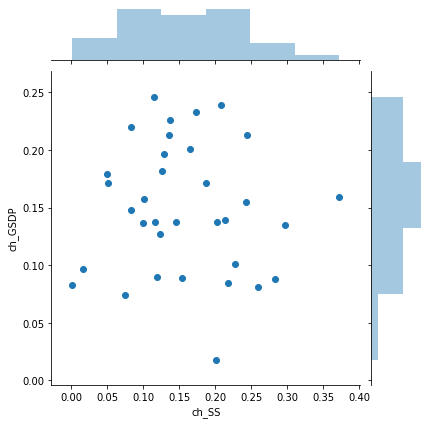

In [39]:
sns.jointplot(x='ch_SS',y='ch_GSDP',data=data)

The above plot isnt encouraging at all.. looks like increase in Social service has little to do with increase in the GDP of that period.

#to lag SS data, ie gdp change x yrs after investing in ss
nxt=[]
for i in range(0,len(data)-1):
    nxt.append(data.iloc[i+1]["ch_GSDP"])
nxt.append(0)
data["ch_GSDP+1"]=nxt


In [88]:
for lag in range (0,3):
    nxt=[]
    for i in range(0,len(data)-lag):
        nxt.append(data.iloc[i+lag]["ch_GSDP"])
    for i in range(0,lag):nxt.append(0)
    data["ch_GSDP_"+str(lag)]=nxt

In [89]:
data.head()

,Years,GSDP,SS,ch_GSDP,ch_SS,ch_GSDP_0,ch_GSDP_1,ch_GSDP_2
1,1981-82,18738.0,847,0.126691,0.123342,0.126691,0.084161,0.154664
2,1982-83,20315.0,1031,0.084161,0.217237,0.084161,0.154664,0.089568
3,1983-84,23457.0,1282,0.154664,0.243453,0.154664,0.089568,0.158776
4,1984-85,25558.0,1434,0.089568,0.118565,0.089568,0.158776,0.080801
5,1985-86,29616.0,1968,0.158776,0.372385,0.158776,0.080801,0.179481


In [82]:
#sns.jointplot(x='ch_SS',y='ch_GSDP+1',data=data)

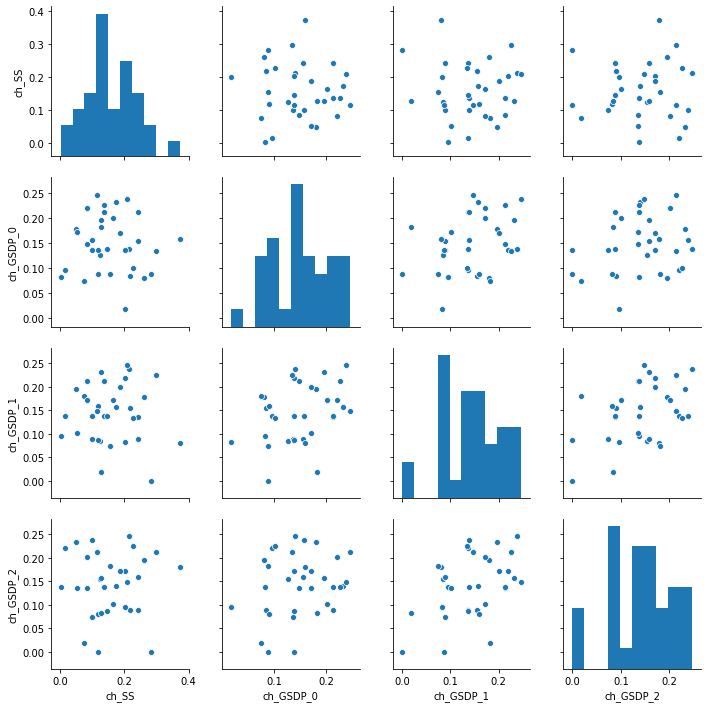

In [90]:
sns.pairplot(data[data.columns[-4:]])

In [101]:
#removing last 2 rows
data=data.iloc[0:len(data)-2]

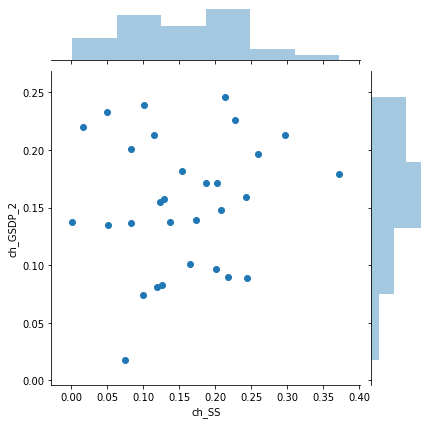

In [102]:
#correlation plot
sns.jointplot(x='ch_SS',y='ch_GSDP_2',data=data)

Doesnt look much good either, but better than plot 1. 

Maybe there is a delayed result to GDP as returns in investment to SS  takes time


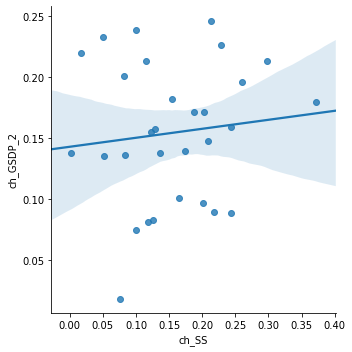

In [103]:
#linear model plot
sns.lmplot(x='ch_SS',y='ch_GSDP_2',data=data)

In [134]:
#Regression data set

#using .values.reshape(-1, 1) to change series to 2D array
#.values to change to 1D....  .reshape(-1,1) to change to 2D
x=data['ch_SS'].values.reshape(-1, 1)
y=data['ch_GSDP_2'].values.reshape(-1, 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=10)

In [135]:
#Reg
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print('Coeff:', lm.coef_)



Coeff: [[0.19088329]]


Text(0, 0.5, 'Predicted Y')

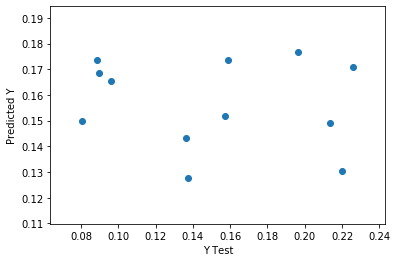

In [136]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

#Result shows its not correlate..its bad. 

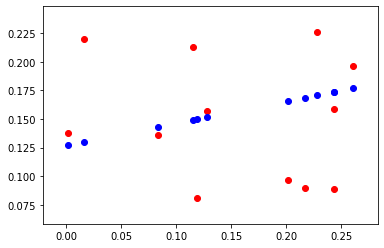

In [150]:
x=X_test
plt.scatter(x,y_test,color='red')
plt.scatter(x,predictions,color='blue')

#not a good fit

In [137]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.04735396251875471
MSE: 0.0032538702189640473
RMSE: 0.057042705221299304


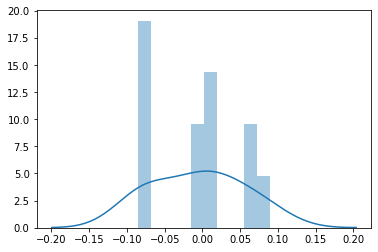

In [142]:
sns.distplot((y_test-predictions),bins=10);

#not normal..bad